In [23]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r"C:\Users\82106\Desktop\제주도\클러스터링\제주도_클러스터링_데이터.xlsx")
df

,정류소아이디,버스개수,배차간격,이용자수,거주인구,근무인구,방문인구,학교수,교사수,학생수,주당수업시수,종속변수
0,1,3.044944,36.882022,46.207865,1.424681e+05,19097.655444,144384.736747,2,97,1083,688,15.175277
1,6,4.561265,47.786561,69.972332,1.187076e+06,112441.264996,458597.838130,10,641,9283,620,15.340555
2,7,3.385185,44.962963,99.696296,1.189324e+06,111493.669348,455381.134741,10,641,9283,620,29.450766
3,8,1.000000,47.500000,129.500000,1.058966e+06,84274.863500,514853.693500,10,641,9283,620,129.500000
4,9,6.505774,48.845266,65.667436,1.188479e+06,111958.761651,455749.051640,10,641,9283,620,10.093717
...,...,...,...,...,...,...,...,...,...,...,...,...
614,4290,1.000000,77.500000,42.222222,8.236243e+05,89305.849000,295616.037222,10,630,9754,999,42.222222
615,4298,1.111111,50.000000,68.333333,7.490121e+05,71571.872889,435507.351111,17,450,4273,330,61.500000
616,4306,2.000000,37.500000,16.000000,9.772078e+04,9562.514000,71327.365500,2,90,209,267,8.000000
617,4371,1.831461,30.000000,17.292135,7.586625e+05,67321.041191,447471.915404,17,450,4273,330,9.441718


In [24]:
df1 = df[['학교수','교사수','학생수','주당수업시수']]
df1

,학교수,교사수,학생수,주당수업시수
0,2,97,1083,688
1,10,641,9283,620
2,10,641,9283,620
3,10,641,9283,620
4,10,641,9283,620
...,...,...,...,...
614,10,630,9754,999
615,17,450,4273,330
616,2,90,209,267
617,17,450,4273,330


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df1_scaled = sc.fit_transform(df1)
df1_scaled_df = pd.DataFrame(df1_scaled, columns=df1.columns)
df_c = df1_scaled_df.dropna()
df_c

,학교수,교사수,학생수,주당수업시수
0,-1.181751,-1.249142,-1.117725,0.014780
1,0.416728,1.249913,1.269725,-0.211277
2,0.416728,1.249913,1.269725,-0.211277
3,0.416728,1.249913,1.269725,-0.211277
4,0.416728,1.249913,1.269725,-0.211277
...,...,...,...,...
614,0.416728,1.199381,1.406858,1.048656
615,1.815397,0.372488,-0.188949,-1.175341
616,-1.181751,-1.281299,-1.372193,-1.384776
617,1.815397,0.372488,-0.188949,-1.175341


In [26]:
# 표준화 확인
print("\n평균:")
print(df_c.mean())
print("\n표준편차:")
print(df_c.std())


평균:
학교수       4.591552e-17
교사수      -9.183105e-17
학생수      -3.443664e-17
주당수업시수    1.033099e-16
dtype: float64

표준편차:
학교수       1.000809
교사수       1.000809
학생수       1.000809
주당수업시수    1.000809
dtype: float64


C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

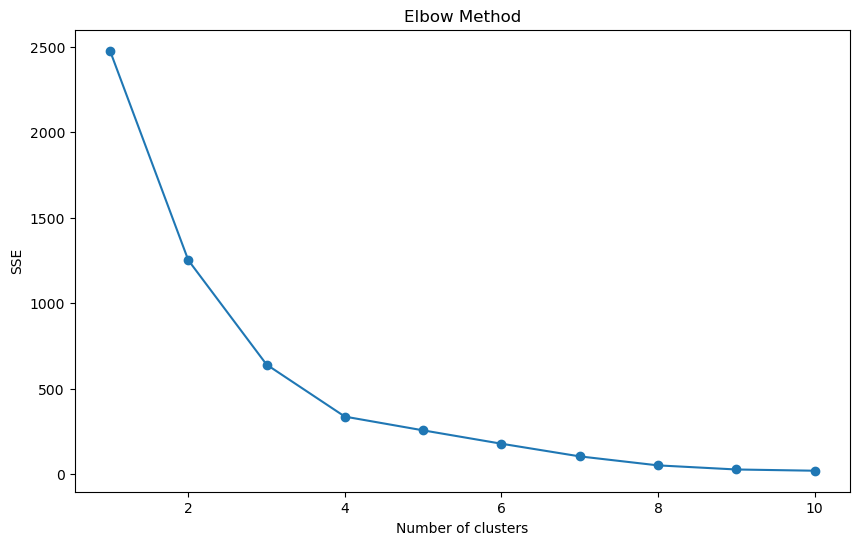

In [27]:
# Elbow Method 적용하여 최적의 클러스터 수 찾기
sse = []
for i in range(1, 11):  # 클러스터 수를 1에서 10까지 시도
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_c)
    sse.append(kmeans.inertia_)  # 각 클러스터 수에 대한 SSE 저장

# SSE 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

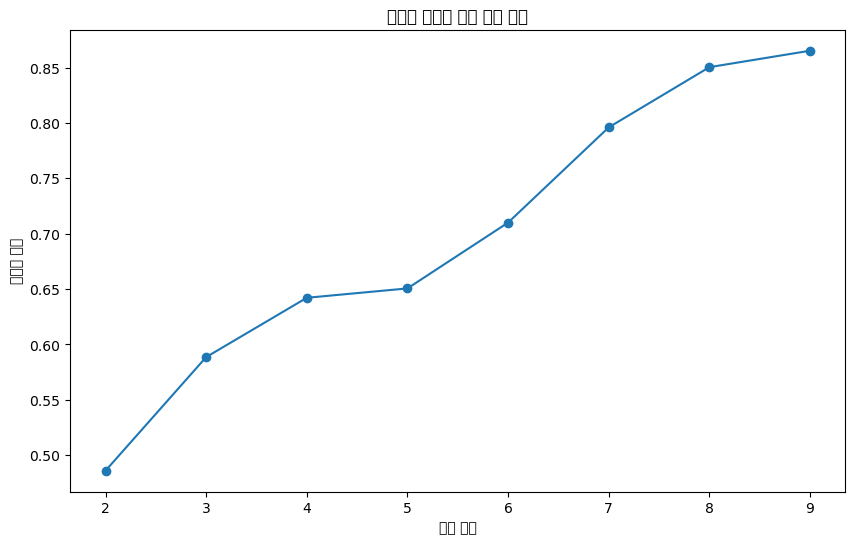

In [28]:
from sklearn.metrics import silhouette_score 

# 군집 개수별로 실루엣 계수 계산
silhouette_coefficients = []
for i in range(2, 10):  # 실루엣 계수는 최소 2개의 클러스터가 필요
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_c)
    score = silhouette_score(df_c, kmeans.labels_)
    silhouette_coefficients.append(score)

# 실루엣 계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_coefficients, marker='o')
plt.title('실루엣 계수에 따른 군집 개수')
plt.xlabel('군집 개수')
plt.ylabel('실루엣 계수')
plt.show()

In [29]:
kmeans=KMeans(n_clusters = 4, random_state = 0,init='k-means++')
clusters = kmeans.fit(df_c)

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [30]:
#클러스터링 품질 측정 : 실루엣 계수 측정
silhouette_avg = silhouette_score(df_c, clusters.labels_)
print(f'클러스터링의 실루엣 계수: {silhouette_avg}')

클러스터링의 실루엣 계수: 0.6421203625453715


In [31]:
df_c['cluster'] = clusters.labels_
df_c.groupby('cluster').count()

,학교수,교사수,학생수,주당수업시수
cluster,,,,
0,193,193,193,193
1,165,165,165,165
2,130,130,130,130
3,131,131,131,131


In [32]:
df_c.groupby('cluster').mean()

,학교수,교사수,학생수,주당수업시수
cluster,,,,
0,0.416728,1.221636,1.346462,0.493763
1,-0.668300,-0.411418,-0.304819,0.940685
2,1.421925,0.057208,-0.378301,-1.239374
3,-1.183276,-1.338389,-1.224374,-0.682372


Cluster 0:

학교 수가 평균보다 약간 많은 편(0.416728)
교사 수가 평균보다 상당히 많은 편(1.221636)
학생 수가 평균보다 상당히 많은 편(1.346462)
주당 수업 시수가 평균보다 약간 많은 편(0.493763)

전반적으로 교육 인프라와 규모가 큰 지역으로 볼 수 있습니다
학교 수, 교사 수, 학생 수가 모두 평균을 상회하고 있으며, 주당 수업 시수도 평균 수준임

Cluster 1:

학교 수가 평균보다 약간 적은 편(-0.668300)
교사 수가 평균보다 약간 적은 편(-0.411418)
학생 수가 평균보다 약간 적은 편(-0.304819)
주당 수업 시수가 평균보다 상당히 많은 편(0.940685)

이 군집은 전반적으로 교육 인프라와 규모가 평균 수준에 근접한 지역 
학교 수, 교사 수, 학생 수가 평균에 근접하고 있지만, 주당 수업 시수가 평균보다 상당히 많은 편으로, 해당 지역에서 교육 활동이 활발하게 이루어지는 것으로 보임

Cluster 2:

학교 수가 평균보다 상당히 많은 편(1.421925)
교사 수가 평균과 유사한 수준(0.057208)
학생 수가 평균보다 약간 적은 편(-0.378301)
주당 수업 시수가 평균보다 상당히 적은 편(-1.239374)

이 군집은 학교 수는 매우 많지만, 교사 수와 학생 수는 평균 수준인 지역
주당 수업 시수가 평균보다 상당히 적은 편이어서, 교육 활동이 상대적으로 활발하지 않은 지역일 가능성이 있음


Cluster 3:

학교 수가 평균보다 상당히 적은 편(-1.183276)
교사 수가 평균보다 상당히 적은 편(-1.338389)
학생 수가 평균보다 상당히 적은 편(-1.224374)
주당 수업 시수가 평균보다 상당히 적은 편(-0.682372)

전반적으로 교육 인프라와 규모가 매우 작은 지역
학교 수, 교사 수, 학생 수가 모두 평균에 크게 미치지 못하는 편이며, 주당 수업 시수도 평균보다 상당히 적은 편임

In [33]:
from sklearn.decomposition import PCA
X = df_c.copy()

pca = PCA(n_components = 2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 2.48585126, -0.74534047],
       [-2.09934094,  0.43511027],
       [-2.09934094,  0.43511027],
       ...,
       [ 3.02007046,  0.18364519],
       [ 0.11719288,  2.23802868],
       [-0.63878471, -0.54382607]])

In [34]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df_c['cluster']
pca_df.head()

,0,1,cluster
0,2.485851,-0.74534,3
1,-2.099341,0.43511,0
2,-2.099341,0.43511,0
3,-2.099341,0.43511,0
4,-2.099341,0.43511,0


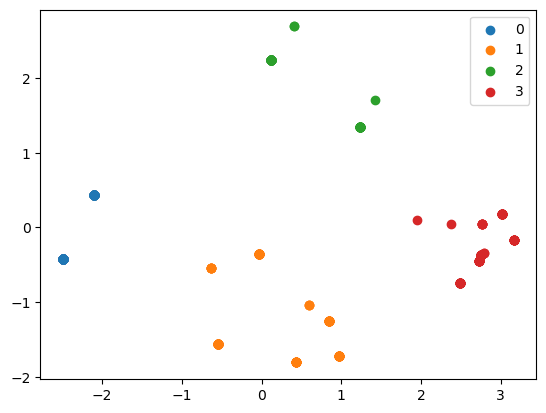

In [35]:
for i in sorted(pca_df['cluster'].unique()):
        tmp = pca_df.loc[pca_df['cluster']==i]
        plt.scatter(tmp[0],tmp[1])
        plt.legend(sorted(pca_df['cluster'].unique()))

In [37]:
c_join = pd.concat([df_c,df], axis = 1)
c_join = c_join[['정류소아이디','cluster']]
c_join

c_join.to_excel(r"C:\Users\82106\Desktop\제주도\클러스터링\제주도_클러스터링_학교.xlsx",index=False)
